# Functions

[File as PDF](https://github.com/fcichos/CBPM24/blob/9ae6b49daa37762aff3057ce5fab3c5190b25ada/source/notebooks/L3/3_functions.pdf)

Python allows to define functions. Functions collect code that you would use repeatedly in your program.

In [20]:
# include the required modules

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina' 

plt.rcParams.update({'font.size': 10,
                     'lines.linewidth': 1,
                     'lines.markersize': 5,
                     'axes.labelsize': 10,
                     'xtick.labelsize' : 9,
                     'ytick.labelsize' : 9,
                     'legend.fontsize' : 8,
                     'contour.linewidth' : 1,
                     'xtick.top' : True,
                     'xtick.direction' : 'in',
                     'ytick.right' : True,
                     'ytick.direction' : 'in',
                     'figure.figsize': (4, 3),
                     'figure.dpi': 150 }) 

## Function definition

Every function definition begins with the word def followed by the name you want to give to the function, sinc in this case, then a list of arguments enclosed in parentheses, and finally terminated with a colon.    
    
~~~
def function_name(parameters):
    """
    This is the docstring documenting the function.
    This is printed if you type help(function_name)
    """
    ## indented statements
    print("Hello, " + name + ". Good morning!")
~~~

The following example calculates $sinc(x) = \sin(x)/x$ and sets it equal to y. The return statement of the last line tells Python to return the value of y to the user.

In [21]:
def sinc(x):
    """
    This function calculates
    sin(x)/x
    """    
    y = np.sin(x)/x
    return(y)

The code for `sinc(x)` works just fine when the argument is a single number or a variable that represents a single number. However, if the argument is a NumPy array, we run into an error.

In [22]:
 x = np.arange(0, 5., 0.5)

In [23]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5])

In [24]:
sinc(x)

/tmp/ipykernel_1425885/3738885869.py:6: RuntimeWarning: invalid value encountered in true_divide
  y = np.sin(x)/x


array([        nan,  0.95885108,  0.84147098,  0.66499666,  0.45464871,
        0.23938886,  0.04704   , -0.10022378, -0.18920062, -0.21722892])

We may intercept the error by checking if the supplied array contains a `0`. This can be done by looping through all elements of the array and 
using our flow control `if`, `else` statements.

In [25]:
def sinc(x): 
    """
    This function calculates
    sin(x)/x
    """  
    y = []
    for xx in x:
        if xx==0.0:
            y+=[1.0]
        else: # adds result of sin(xx)/xx to y list if
            y+=[np.sin(xx)/xx] # xx is not zero
    return np.array(y) # converts y to array and returns array



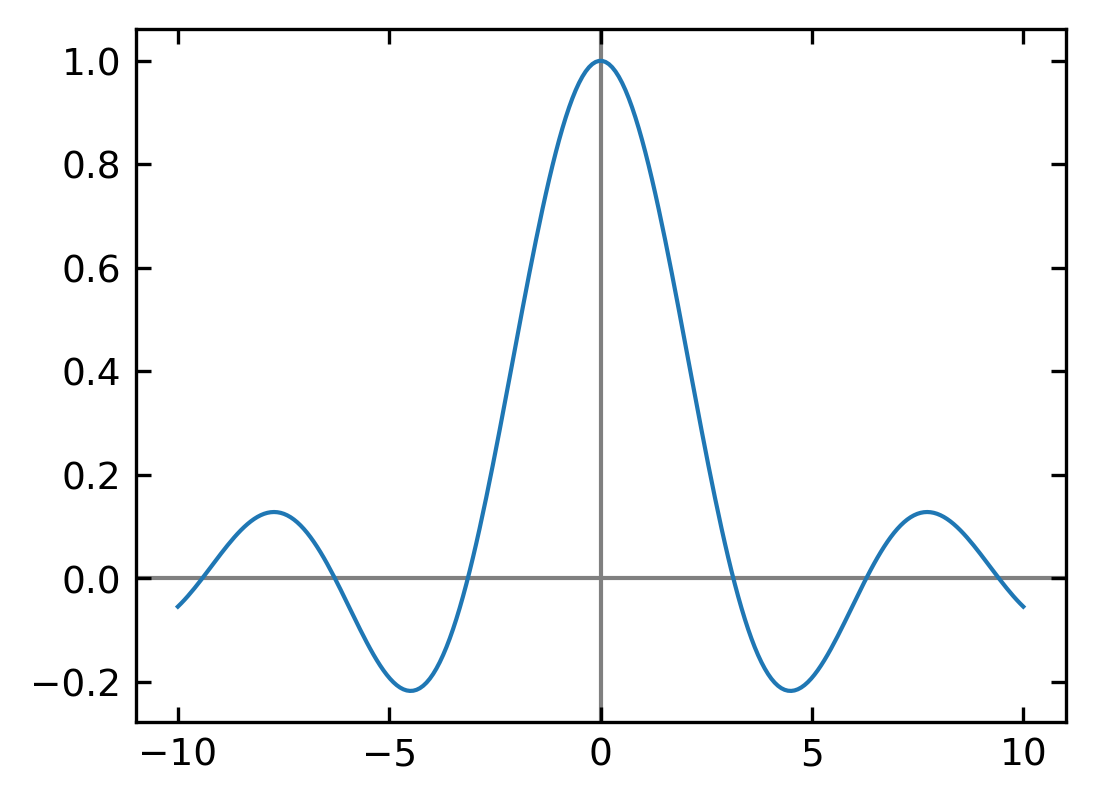

In [26]:
x = np.linspace(-10, 10, 256)
y = sinc(x)

plt.plot(x, y)
plt.axhline(color="gray", zorder=-1)
plt.axvline(color="gray", zorder=-1)
plt.show()

Loops are in general slowly executed and there is a faster way of checking the elements of an array by the `np.where` function of the NumPy library. There where function has the form

~~~
np.where(condition, output if True, output if False)
~~~

The `where` function applies the condition to the array element by element, and returns the second argument for those array elements for which the condition is True, and returns the third argument for those array elements that are False. 

In [27]:
def sinc(x):
    """
    This function calculates
    sin(x)/x
    """      
    z = np.where(x==0.0, 1.0, np.sin(x)/x)
    return(z)

This code executes much faster, 25 to 100 times, depending on the size of the array, than the code using a for loop. Moreover, the new code is much simpler to write and read.

## Variables in functions

Parameters and variables defined inside a function are not visible from outside the function. Hence, they are called to have a *local scope*.
Variables inside a function live for the time as long as the function executes. They are destroyed once we return from the function. 
Hence, a function does not remember the value of a variable from its previous calls.



<div class="alert alert-warning">

**Note** Local and global variables

* **local** variables are visible to the inside of a function and live for the time the function is executed
* **global** variable are visible outside and inside of a function but can not be changed inside a function except they are declared as `global`     

</div>

Here is an example to illustrate the scope of a variable inside a function.

In [30]:
def my_function(x):
    """
    Function to demonstrate the use of local and global variables
    sin(x)/x
    """     
    global y #refer to a global variable
    
    x = 10
    y=y+15
    print("This is a local variable:",x)

x = 20
y = 30
my_function(x)
print("This is a global :",x)
print("This is a changed global :",y)

This is a local variable: 10
This is a global : 20
This is a changed global : 45


##  Functions with more than one input or output

Python functions can have any number of input arguments and can return any number of variables. For example, suppose you want a function that outputs n (x, y) coordinates around a circle of radius r centered at the point (x0 , y0 ). The inputs to the function would be r, x0, y0, and n. The outputs would be the n (x, y) coordinates. The following code implements this function.

In [34]:
def circle(r, x0, y0, n):
    theta = np.linspace(0., 2.*np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return(x0+x, y0+y)

This function has four inputs and two outputs. In this case, the four inputs are simple numeric variables and the two outputs are NumPy arrays. In general, the inputs and outputs can be any combination of data types: arrays, lists, strings, etc. Of course, the body of the function must be written to be consistent with the prescribed data types.
Functions can also return nothing to the calling program but just perform some task.

### Positional and keyword arguments

It is often useful to have function arguments that have some default setting. This happens when you want an input to a function to have some standard value or setting most of the time, but you would like to reserve the possibility of giving it some value other than the default value.

In [31]:
def circle(r, x0=0.0, y0=0.0, n=12):
    theta = np.linspace(0., 2.*np.pi, n, endpoint=False)
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x0+x, y0+y

The default values of the arguments x0, y0, and n are specified in the argument of the function definition in the def line. Arguments whose default values are specified in this manner are called keyword arguments, and they can be omitted from the function call if the user is content using those values.

In [32]:
x,y=circle(3,y0=3,n=100)

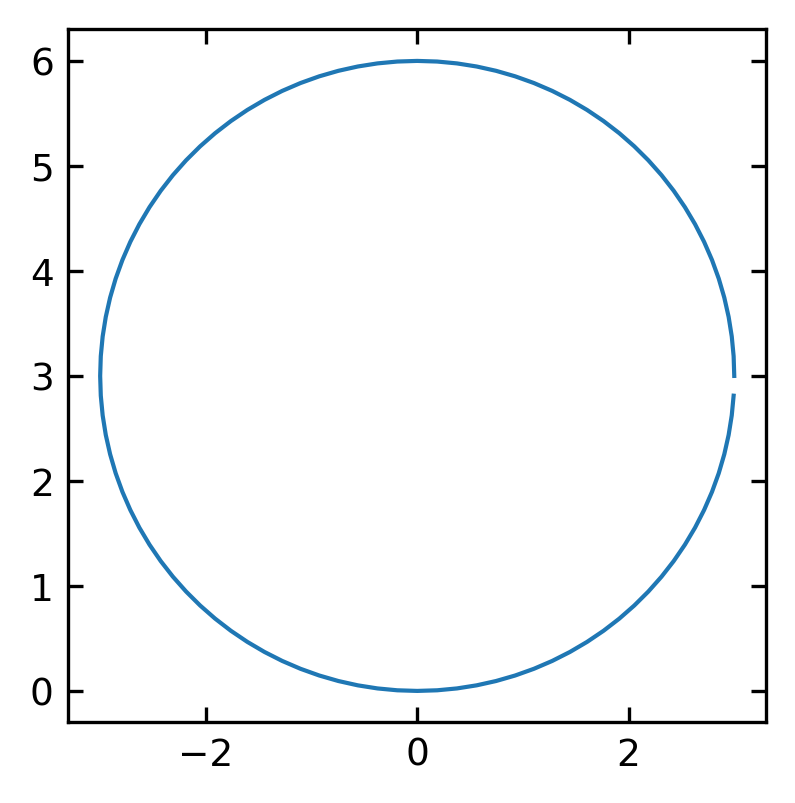

In [33]:
plt.figure(figsize=(3,3))
plt.plot(x,y)
plt.show()

### Functions with variable number of arguments


While it may seem odd, it is sometimes useful to leave the number of arguments unspecified. A simple example is a function that computes the product of an arbitrary number of numbers:

In [50]:
def product(*args):
    print("args = {}".format(args))
    p = 1
    for num in args:
        p *= num
    return p

In [163]:
product(2,3,4,5,6)

args = (2, 3, 4, 5, 6)


720

The print("args...) statement in the function definition is not necessary, of course, but is put in to show that the argument args is a tuple inside the function. Here it used because one does not know ahead of time how many numbers are to be multiplied together.




The *args argument is also quite useful in another context: when passing the name of a function as an argument in another function. In many cases, the function name that is passed may have a number of parameters that must also be passed but aren’t known ahead of time. If this all sounds a bit confusing—functions calling other functions—a concrete example will help you understand.


In [51]:
def f1(x, a, p): 
        return a*x**p

In [54]:
def f2(x, a, p): 
        return a*np.sin(p*x)

In [52]:
def test(function, x, h=2, *params):    
    return function(x+h,*params)

In [56]:
test(f1, 3, 2, 2, 3)

250

The order of the parameters is important. The function *test* uses x, the first argument of f1, as its principal argument, and then uses *a* and *p*, in the same order that they are defined in the function f1, to fill in the additional arguments—the parameters—of the function f1.


## Unnamed functions (lambda function)

In Python but also in other higher lever programming languages we can also create unnamed functions, using the `lambda` keyword:

In [57]:
f1= lambda x: x**2
    
# is equivalent to 

def f2(x):
    return x**2

In [58]:
f1(2), f2(2)

(4, 4)

Lambda functions are used when you need a function for a short period of time. This is commonly used when you want to pass a function as an argument to higher-order functions, that is, functions that take other functions as their arguments.


In [60]:
def testfunc(num):
    return lambda x : x * num

In the above example, we have a function that takes one argument, and the argument is to be multiplied with a number that is unknown. Let us demonstrate how to use the above function:

In [61]:
result1 = testfunc(10)
result2 = testfunc(1000)

print(result1(9))
print(result2(9))

90
9000


In [67]:
p = [(3, 3), (4, 2), (2, 2), (5, 2), (1, 7)] 

q = sorted(p, key=lambda x: x[0]*x[1],reverse=True) 
print(q) # [(2, 2), (1, 7), (4, 2), (3, 3), (5, 2)] 

[(5, 2), (3, 3), (4, 2), (1, 7), (2, 2)]


## Functions as arguments of functions


Functions can be passed around as arguments, as we have seen above. This is a very useful thing, which we may use in out physical modeling for numerical differentiation below. 

**Numerical Differentiation**. What we want to calculate, is the derivative of a function $f(x)$ where the function values are given at certain positions $x_{i}$. Since we do not want to calculate the symbolic derivative, we have to get along with an numerical approximation. This can be obtained by looking at the definition of the derivative, i.e. the first derivative 

\begin{equation}
f^{\prime}(x)=\lim_{\delta x->0}\frac{f(x+\delta x)-f(x)}{\delta x}
\end{equation}

If the function values are given at the positions $x_{i}$ with $\delta x_{i}=x_{i+1}-x_{i}$, the an approximate value of the first derivative can be found from 

$$f^{\prime}(x)\approx\frac{f(x+\delta x)-f(x)}{\delta x}=\frac{f(x_{i+1})-f(x_{i})}{x_{i+1}-x_{i}}$$

This already delivers a good approximation of the first derivative of a function as we see in the next examples. 


So lets turn that into a function.



In [89]:
def D(f, x, *params, delta_x=1.e-9):
    return (f(x+delta_x, *params)-f(x, *params))/(delta_x)

where our function shall be given by:

In [105]:
def f0(x):
    return 4.*x**2

In [106]:
D(f0,3)

24.000001985768904

In [100]:
x=np.linspace(-5,5,100)

In [107]:
y=f0(x)
yp=D(f0,x)

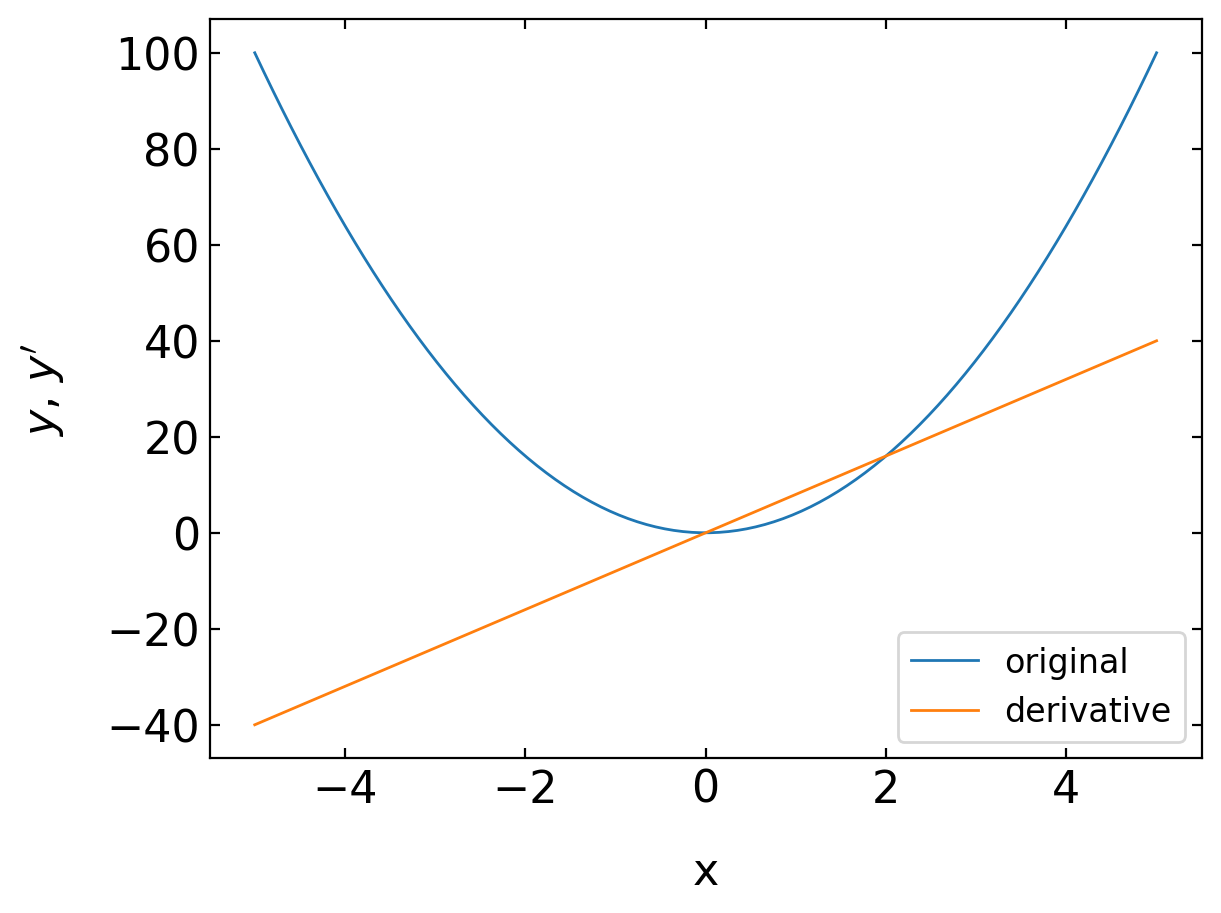

In [108]:
plt.plot(x,y,label='original')
plt.plot(x,yp,label='derivative')
plt.xlabel('x')
plt.ylabel('$y$, $y^{\prime}$')
plt.legend()
plt.show()

We may similarly also define a second derivative



\begin{equation}
f^{\prime\prime}(x_{i})\approx\frac{f(x+2\delta x)-2f(x+\delta x)+f(x)}{\delta x^2}=\frac{f(x_{i+2})-2f(x_{i+1})+f(x_{i})}{(x_{i+1}-x_{i})^2}
\end{equation}

In [109]:
def D2(f, x, h=1.e-6, *params):
    return (f(x+2*h, *params)-2*f(x+h, *params)+f(x,*params))/(h**2)

In [110]:
y=f0(x) # original function
yp=D(f0,x) # first derivative
ypp=D2(f0,x) # second derivative

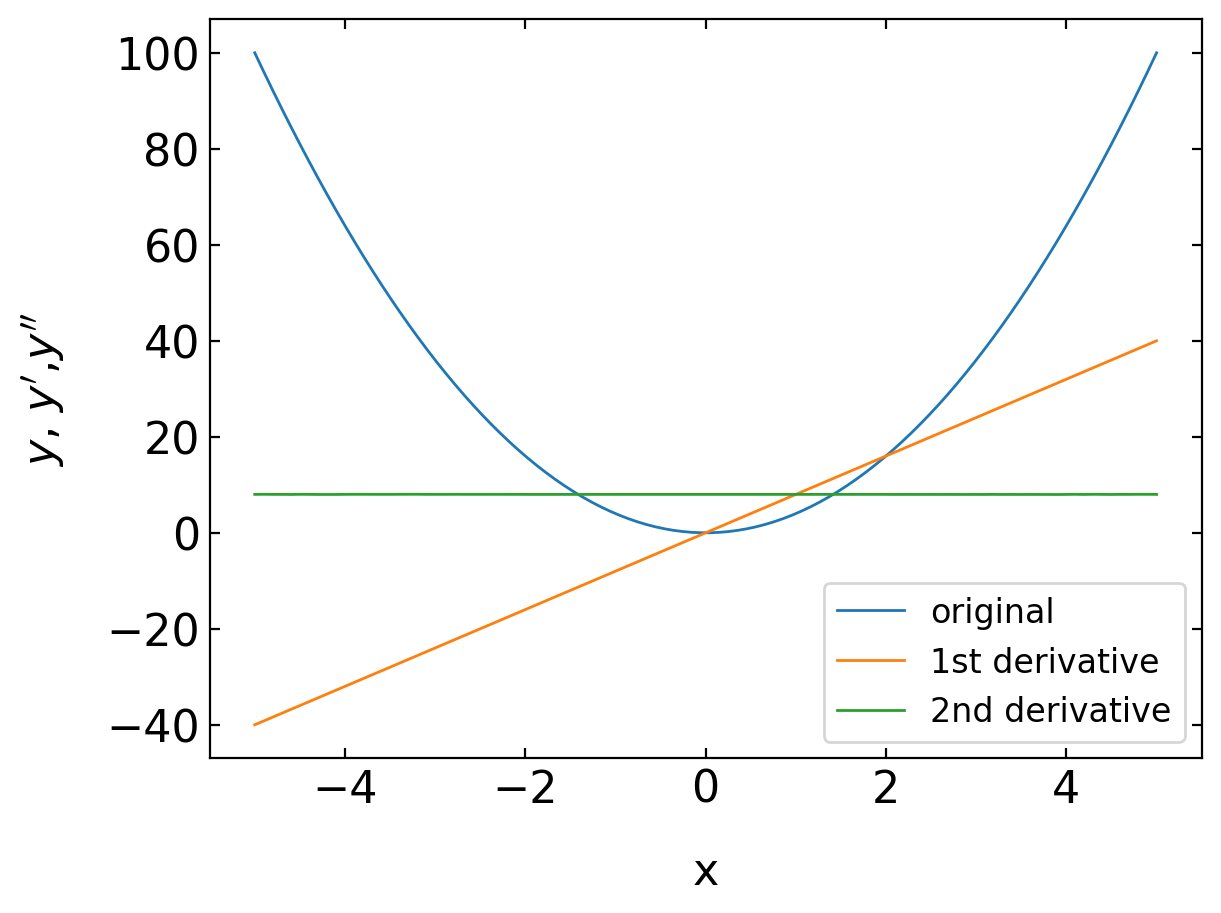

In [111]:
plt.plot(x,y,label='original')
plt.plot(x,yp,label='1st derivative')
plt.plot(x,ypp,label='2nd derivative')
plt.xlabel('x')
plt.ylabel('$y$, $y^{\prime}$,$y^{\prime\prime}$')
plt.legend()
plt.show()

 ## First-Class Objects, Inner Functions and Decorators

So far we have had a short look at so-called functions as **First-Class objects**, which means, that they can be passed around as arguments like any other variable. The example below defines two greeter functions that are used in a third function to greet.

In [2]:
def hello(name):
    return f"Hello {name}"

def howdy(name):
    return f"Yo {name}, what's up!"

def greet(greeter_func):
    return greeter_func("Dude")

In [112]:
greet(hello)

'Hello Dude'

In [113]:
greet(howdy)

"Yo Dude, what's up!"

The greeter function `hello` or `howdy` are passed to the greet as function arguments and then called with the same argument.

Functions can, however, be also defined inside of other function like in the example below.

In [114]:
def parent():
    print("Printing from the parent() function")

    def first_child():
        print("Printing from the first_child() function")

    def second_child():
        print("Printing from the second_child() function")

    second_child()
    first_child()

Here the functions `first_child` and `second_child` are local functions inside the `parent`function and only known inside this function. They are therefore called **inner functions**. Look at the corresponding output of the parent function

In [115]:
parent()

Printing from the parent() function
Printing from the second_child() function
Printing from the first_child() function


and try to call the `first_child` function

In [116]:
first_child()

NameError: name 'first_child' is not defined

This function is not known outside the `parent` function. 

Now in addition to that we can also return functions from a function like in the following example:

In [129]:
def parent(num):
    def first_child():
        return "Hi, I am Emma"

    def second_child(name):
        return "Call me {}".format(name)

    if num == 1:
        return first_child
    else:
        return second_child

This means that we can assign the function `first_child` to a variable first

In [132]:
first=parent(1)

such that this variable is now of type `function`.

In [126]:
type(first)

function

In [134]:
first()

'Hi, I am Emma'

We have now all elements collected to introduce some new magic, which you probably have to digest with the help of some external sources. The new magic is called **decorators**.

In [12]:
def my_decorator(func):
    def wrapper():
        print("I can do something before the function.")
        func()
        print("And I can do something after the function.")
    return wrapper

def do_something():
    print("Then I execute the original function!")

do_something = my_decorator(do_something)

If you execute the function `do_something` you will probably recognize the magic. 

In [13]:
do_something()

I can do something before the function.
Then I execute the original function!
And I can do something after the function.


To explain the details shortly, we first define a function `my_decorator` which is intended to use a function as an argument. In this function we define an inner function `wrapper`, which calls the function `func` inbetween two print statements. After this definition is done, the function `my_decorator` returns this wrapper function. 

The next function definition is a normal one. `do_something` is just printing some text. The final line assigns to the variable *do_something* the return value of the `my_decorator` function, that is called with the `do_something`function as an argument. Thus the wrapper function will be the return argument that is passed to the  *do_something* variable.

The original function call is now *wrapped* inside other function calls but has still the same name. **So what?**

Well this type of decorators is useful, when you want to modify the behavior of existing functions without changing their name and completely redefining their functionality. We just have a look at some more syntax magic, which actually makes more sense, as the statement **@my_decorator** now decorates the original function 
`do_something`.

In [18]:
def my_decorator(func):
    def wrapper():
        print("I can do something before the function.")
        func()
        print("And I can do something after the function.")
    return wrapper

@my_decorator
def do_something():
    print("Then I execute the original function!")


We can therefore save the last line of the previous definition. This is the common way decorators are used.

In [17]:
do_something()

Then I execute the original function!
